In [1]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
df_normalizado = pd.json_normalize(data)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
for col in df_normalizado.columns:
    print(f'valores únicos na coluna {col} : {df_normalizado[col].nunique()}')
    if df_normalizado[col].nunique() < 50:
        print(df_normalizado[col].unique())
        print('_'*50)

valores únicos na coluna customerID : 7267
valores únicos na coluna Churn : 3
['No' 'Yes' '']
__________________________________________________
valores únicos na coluna customer.gender : 2
['Female' 'Male']
__________________________________________________
valores únicos na coluna customer.SeniorCitizen : 2
[0 1]
__________________________________________________
valores únicos na coluna customer.Partner : 2
['Yes' 'No']
__________________________________________________
valores únicos na coluna customer.Dependents : 2
['Yes' 'No']
__________________________________________________
valores únicos na coluna customer.tenure : 73
valores únicos na coluna phone.PhoneService : 2
['Yes' 'No']
__________________________________________________
valores únicos na coluna phone.MultipleLines : 3
['No' 'Yes' 'No phone service']
__________________________________________________
valores únicos na coluna internet.InternetService : 3
['DSL' 'Fiber optic' 'No']
______________________________________

In [4]:
df_normalizado['Churn'].nunique()

3

In [5]:
df_normalizado.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
duplicados = df_normalizado.duplicated().sum()
print(f'Quantidade de duplicados: {duplicados}')

valores_nulos = df_normalizado.isnull().values.sum()
print('\nValores nulos por coluna:')
print(valores_nulos[valores_nulos > 0])

Quantidade de duplicados: 0

Valores nulos por coluna:
[]


In [7]:
df_normalizado.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [8]:
df_normalizado.isnull()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [10]:
df_normalizado.head(100)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0151-ONTOV,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,70.90,70.9
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
97,0156-FVPTA,Yes,Male,0,Yes,No,22,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.20,1152.7
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85


In [11]:
df.shape

(7267, 6)

In [12]:
df_normalizado.shape

(7267, 21)

In [13]:
# Detectar valores que parecem NaN mas não são
for col in df_normalizado.columns:
    mascara_suspeita = df_normalizado[col].astype(str).str.strip().isin(["", " ", "NaN", "nan", "NULL", "null", "?", "None"])
    if mascara_suspeita.sum() > 0:
        print(f"Possíveis nulos ocultos em {col}: {mascara_suspeita.sum()}")


Possíveis nulos ocultos em Churn: 224
Possíveis nulos ocultos em account.Charges.Total: 11


In [14]:
# === 1. Remover valores nulos "camuflados" na coluna 'Churn' ===
# Justificativa:
# A coluna 'Churn' é a variável alvo (label) do nosso problema de análise ou modelagem preditiva.
# Se ela estiver ausente, não temos como saber a classe correta do cliente (se saiu ou não).
# Como não podemos inferir esse valor sem correr o risco de introduzir viés,
# a melhor decisão é excluir completamente esses registros.

df_normalizado = df_normalizado[~df_normalizado['Churn'].astype(str).str.strip().isin(["", " ", "NaN", "nan", "NULL", "null", "?", "None"])]
df_normalizado.shape




(7043, 21)

In [15]:
df_normalizado_nulos = df_normalizado.dropna(subset=['Churn'])
df_normalizado.shape

(7043, 21)

In [16]:
df_normalizado_nulos.shape

(7043, 21)

In [17]:
# === 2. Encontrar e exibir apenas os registros com nulos camuflados em 'account.Charges.Total' ===
# Aqui não vamos excluir direto — primeiro vamos analisar em um dataframe separado.
mascara_total_suspeito = df_normalizado['account.Charges.Total'] \
    .astype(str) \
    .str.strip() \
    .isin(["", " ", "NaN", "nan", "NULL", "null", "?", "None"])

mascara_total_suspeito

,account.Charges.Total
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [18]:
# Criando um DataFrame com apenas esses 11 casos suspeitos
df_charges_total_suspeito = df_normalizado[mascara_total_suspeito]
df_charges_total_suspeito

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [19]:
# Exibindo para inspeção
print("Registros com valores ocultos em 'account.Charges.Total':")
print(df_charges_total_suspeito)

Registros com valores ocultos em 'account.Charges.Total':
      customerID Churn customer.gender  customer.SeniorCitizen  \
975   1371-DWPAZ    No          Female                       0   
1775  2520-SGTTA    No          Female                       0   
1955  2775-SEFEE    No            Male                       0   
2075  2923-ARZLG    No            Male                       0   
2232  3115-CZMZD    No            Male                       0   
2308  3213-VVOLG    No            Male                       0   
2930  4075-WKNIU    No          Female                       0   
3134  4367-NUYAO    No            Male                       0   
3203  4472-LVYGI    No          Female                       0   
4169  5709-LVOEQ    No          Female                       0   
5599  7644-OMVMY    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
975               Yes                 Yes                0          

In [20]:
df_normalizado = df_normalizado[~df_normalizado['account.Charges.Total'].astype(str).str.strip().isin(["", " ", "NaN", "nan", "NULL", "null", "?", "None"])]

In [21]:
df_normalizado['Churn'].nunique()

2

In [22]:
# Criando um DataFrame com apenas esses 11 casos suspeitos
df_charges_total_suspeito = df_normalizado[mascara_total_suspeito]
df_charges_total_suspeito

/tmp/ipython-input-2679027228.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_charges_total_suspeito = df_normalizado[mascara_total_suspeito]


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [23]:
df_normalizado.shape

(7032, 21)

In [24]:
# Conversão de 'account.Charges.Total' para tipo numérico
# errors='coerce' => valores inválidos serão transformados em NaN
df_normalizado['account.Charges.Total'] = pd.to_numeric(
    df_normalizado['account.Charges.Total'], errors='coerce'
)

# Contar quantos NaNs surgiram após a conversão
qtd_nulos_total = df_normalizado['account.Charges.Total'].isna().sum()
print(f"Valores NaN em 'account.Charges.Total' após conversão: {qtd_nulos_total}")

# Se quiser inspecionar quais são esses casos
df_total_na = df_normalizado[df_normalizado['account.Charges.Total'].isna()]
print(df_total_na)

Valores NaN em 'account.Charges.Total' após conversão: 0
Empty DataFrame
Columns: [customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, phone.PhoneService, phone.MultipleLines, internet.InternetService, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies, account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly, account.Charges.Total]
Index: []

[0 rows x 21 columns]


In [25]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [26]:
df_normalizado.head(100)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0164-APGRB,No,Female,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70
100,0164-XAIRP,No,Female,0,No,No,24,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.55,470.20
101,0168-XZKBB,No,Female,0,Yes,No,19,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,1564.40
102,0174-QRVVY,No,Male,0,Yes,Yes,71,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.35,1847.55


In [27]:
# Listar categorias únicas para cada coluna e ver se existem variações de escrita:
for col in df_normalizado.select_dtypes(include='object'):
    print(f"\nColuna: {col}")
    print(df_normalizado[col].unique())


Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes']

Coluna: customer.gender
['Female' 'Male']

Coluna: customer.Partner
['Yes' 'No']

Coluna: customer.Dependents
['Yes' 'No']

Coluna: phone.PhoneService
['Yes' 'No']

Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']

Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: internet.TechSupport
['Yes' 'No' 'No internet service']

Coluna: internet.StreamingTV
['Yes' 'No' 'No internet service']

Coluna: internet.StreamingMovies
['No' 'Yes' 'No internet service']

Coluna: account.Contract
['One year' 'Month-to-month' 'Two year']

Coluna: account.PaperlessBilling
['Yes' 'No']

Coluna: account.PaymentMethod
['Mailed check' 'Electronic chec

In [ ]:
# Criar a coluna 'Contas_Diarias' dividindo o faturamento mensal por 30
df_normalizado['Contas_Diarias'] = df_normalizado['account.Charges.Total'] / 30

# Verificar se a nova coluna foi criada corretamente
print("Primeiras 5 linhas com a nova coluna 'Contas_Diarias':")
print(df_normalizado[['account.Charges.Total', 'Contas_Diarias']].head())

# Verificar se há valores nulos na nova coluna
qtd_nulos_diarias = df_normalizado['Contas_Diarias'].isna().sum()
print(f"Valores NaN em 'Contas_Diarias': {qtd_nulos_diarias}")

# Se houver valores nulos, você pode inspecioná-los
if qtd_nulos_diarias > 0:
    print("Registros com valores nulos em 'Contas_Diarias':")
    print(df_normalizado[df_normalizado['Contas_Diarias'].isna()])

In [34]:
# Listar todas as colunas disponíveis no DataFrame para inspeção
print("Colunas disponíveis no DataFrame:")
print(df_normalizado.columns.tolist())

# Ajustando a lista de colunas numéricas com base no dataset
# Substituí 'tenure' por 'customer.tenure' (comum em datasets de churn)
colunas_numericas = [
    'customer.tenure',  # Ajustado para o nome provável
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Contas_Diarias'
]

# Verificando se as colunas existem no DataFrame
colunas_validas = [col for col in colunas_numericas if col in df_normalizado.columns]
if not colunas_validas:
    print("Nenhuma coluna numérica válida encontrada. Verifique os nomes das colunas.")
else:
    # Calculando métricas gerais (média, mediana, desvio padrão)
    metricas_gerais = df_normalizado[colunas_validas].agg(['mean', 'median', 'std']).round(2)
    print("\nMétricas gerais (média, mediana, desvio padrão):")
    print(metricas_gerais)

    # Calculando métricas agrupadas por 'Churn'
    metricas_por_churn = df_normalizado.groupby('Churn')[colunas_validas].agg(['mean', 'median', 'std']).round(2)
    print("\nMétricas agrupadas por Churn (média, mediana, desvio padrão):")
    print(metricas_por_churn)

Colunas disponíveis no DataFrame:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

Métricas gerais (média, mediana, desvio padrão):
        customer.tenure  account.Charges.Monthly  account.Charges.Total  \
mean              32.35                    64.72                2280.63   
median            29.00                    70.30                1391.00   
std               24.57                    30.13                2268.63   

        Contas_Diarias  
mean             76.02  
median           46.37  
std              75.62  

Métricas a

Valores únicos em 'Churn':
['No' 'Yes' '']


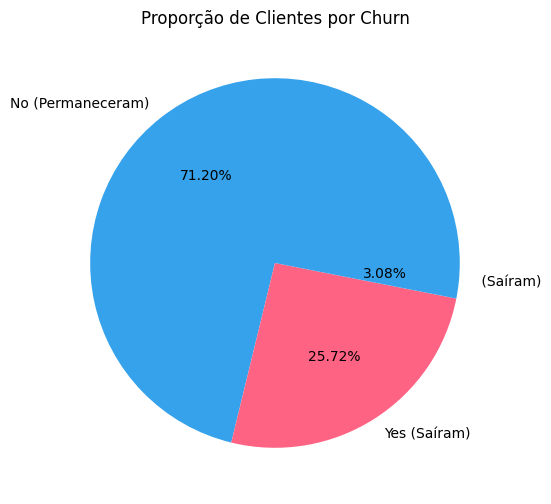

In [36]:
import matplotlib.pyplot as plt

# Inspecionando os valores únicos na coluna 'Churn'
print("Valores únicos em 'Churn':")
print(df_normalizado['Churn'].unique())

# Calculando a proporção de Churn
proporcao_churn = df_normalizado['Churn'].value_counts(normalize=True) * 100

# Criando rótulos dinâmicos com base nos valores de 'Churn'
labels = [f"{valor} ({'Permaneceram' if valor == 'No' else 'Saíram'})" for valor in proporcao_churn.index]

# Criando o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(proporcao_churn, labels=labels, autopct='%1.2f%%', colors=['#36A2EB', '#FF6384'])
plt.title('Proporção de Clientes por Churn')
plt.show()

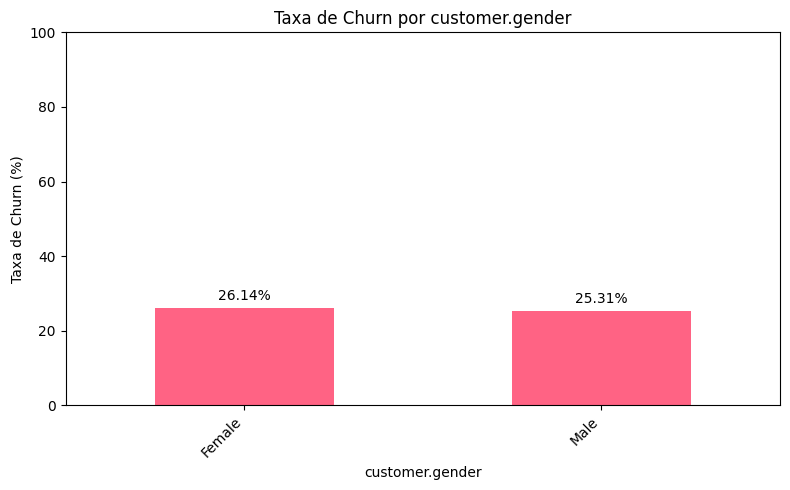

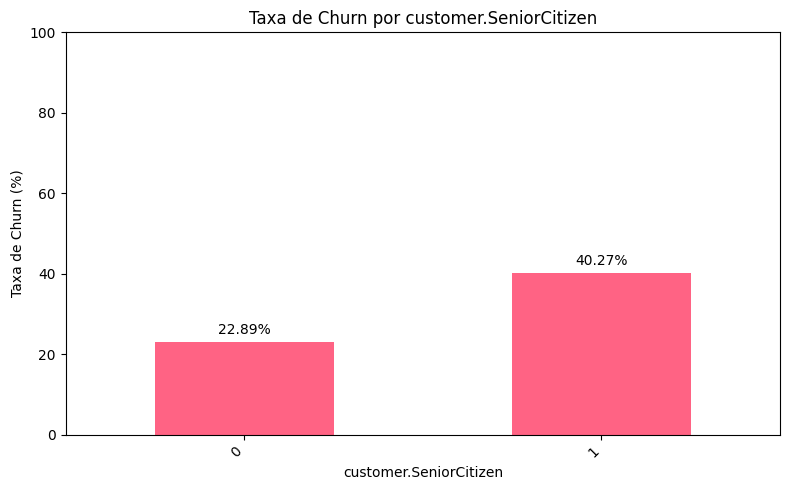

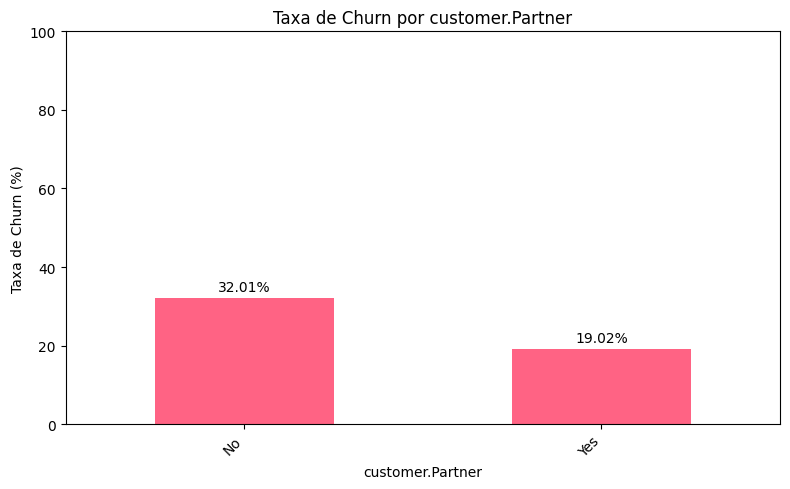

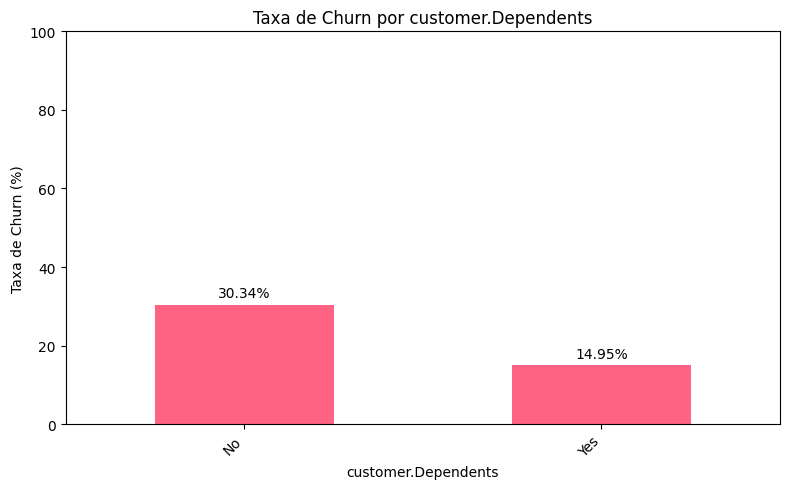

Coluna customer.Contract não encontrada no DataFrame.
Coluna customer.InternetService não encontrada no DataFrame.
Coluna customer.PaymentMethod não encontrada no DataFrame.


In [37]:
import matplotlib.pyplot as plt

# Lista de variáveis categóricas para análise
variaveis_categoricas = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'customer.Contract',
    'customer.InternetService',
    'customer.PaymentMethod'
]

# Função para calcular e visualizar taxa de churn por variável categórica
def plot_churn_por_categorica(variavel):
    if variavel not in df_normalizado.columns:
        print(f"Coluna {variavel} não encontrada no DataFrame.")
        return

    # Calculando a taxa de churn (proporção de 'Yes') por categoria
    taxa_churn = df_normalizado.groupby(variavel)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    taxa_churn_yes = taxa_churn.get('Yes', 0) * 100  # Percentual de churn

    # Criando o gráfico de barras
    plt.figure(figsize=(8, 5))
    taxa_churn_yes.plot(kind='bar', color='#FF6384')
    plt.title(f'Taxa de Churn por {variavel}')
    plt.xlabel(variavel)
    plt.ylabel('Taxa de Churn (%)')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    for i, valor in enumerate(taxa_churn_yes):
        plt.text(i, valor + 2, f'{valor:.2f}%', ha='center')
    plt.tight_layout()
    plt.show()

# Executando para cada variável categórica
for variavel in variaveis_categoricas:
    plot_churn_por_categorica(variavel)

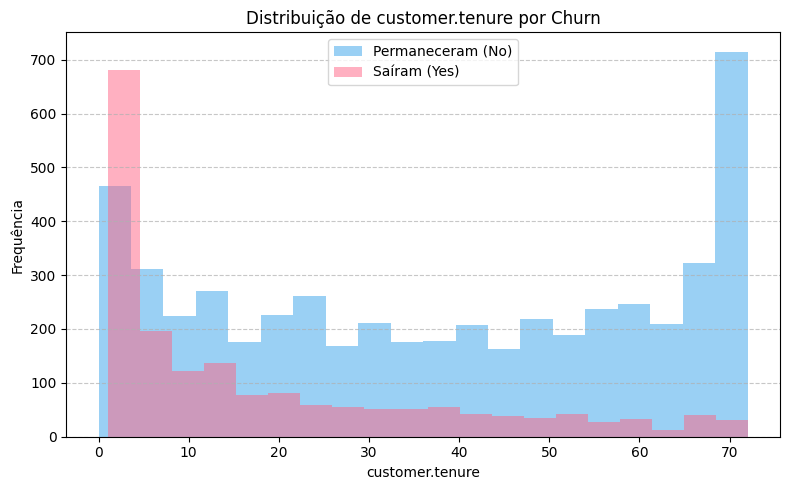

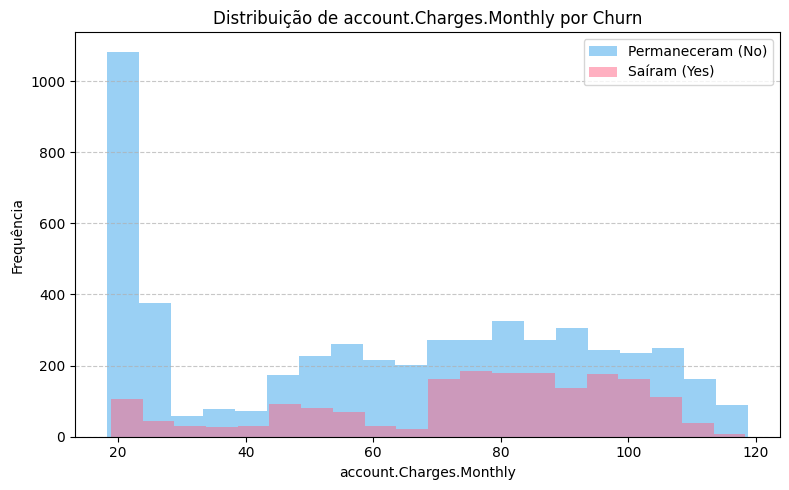

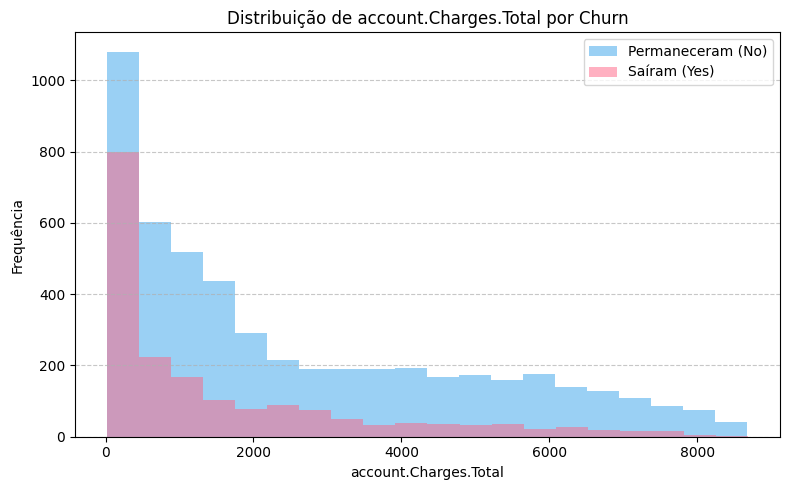

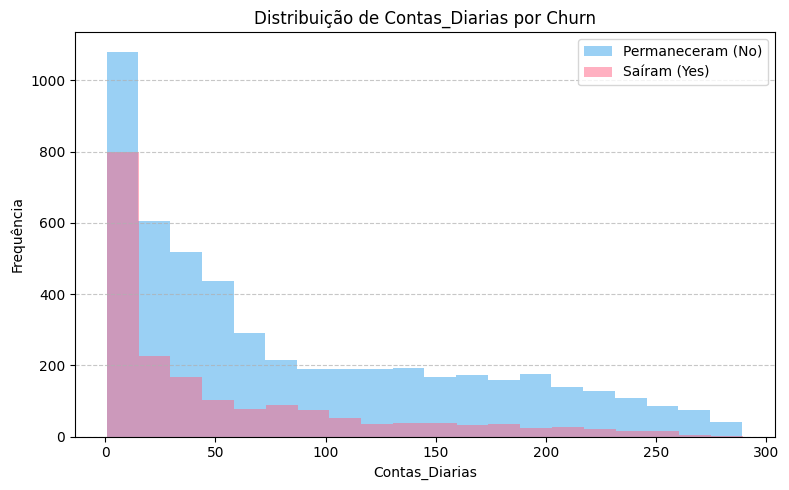

In [39]:
import matplotlib.pyplot as plt

# Colunas numéricas para análise
colunas_numericas = [
    'customer.tenure',           # Tempo de contrato
    'account.Charges.Monthly',   # Cobranças mensais
    'account.Charges.Total',     # Total gasto
    'Contas_Diarias'             # Cobranças diárias
]

# Função para visualizar distribuição por Churn usando histogramas
def plot_distribuicao_por_churn(variavel):
    if variavel not in df_normalizado.columns:
        print(f"Coluna {variavel} não encontrada no DataFrame.")
        return

    # Filtrando dados para Churn = Yes e No
    churn_yes = df_normalizado[df_normalizado['Churn'] == 'Yes'][variavel].dropna()
    churn_no = df_normalizado[df_normalizado['Churn'] == 'No'][variavel].dropna()

    # Criando o histograma
    plt.figure(figsize=(8, 5))
    plt.hist(churn_no, bins=20, alpha=0.5, color='#36A2EB', label='Permaneceram (No)')
    plt.hist(churn_yes, bins=20, alpha=0.5, color='#FF6384', label='Saíram (Yes)')
    plt.title(f'Distribuição de {variavel} por Churn')
    plt.xlabel(variavel)
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Executando para cada variável numérica
for variavel in colunas_numericas:
    plot_distribuicao_por_churn(variavel)

#📄Relatorio Final

In [40]:
# 1) O objetivo desta análise é investigar os fatores que contribuem para a evasão de clientes (Churn) na Telecom X, uma empresa que enfrenta altos índices de cancelamentos. O churn representa a perda de clientes, o que impacta diretamente a receita e a sustentabilidade do negócio. Através de análise de dados, buscamos identificar padrões comportamentais e variáveis associadas à evasão, permitindo o desenvolvimento de estratégias para retenção de clientes

# 2) Limpeza e Tratamento de Dados:
# Os dados foram carregados de um arquivo JSON hospedado em uma URL via requests e normalizados com pd.json_normalize para um DataFrame estruturado.
# Verificação de Duplicados e Nulos: Identificamos e removemos duplicados (nenhum encontrado). Tratamos valores nulos ocultos em 'Churn' (ex.: strings vazias ou 'NaN') e removemos linhas inválidas. Não havia valores nulos em outras colunas críticas após inspeção.
# Conversão de Tipos: Convertemos 'account.Charges.Total' para numérico usando pd.to_numeric, tratando erros como NaN (nenhum após tratamento).
# Criação de Nova Coluna: Adicionamos 'Contas_Diarias' dividindo 'account.Charges.Total' por 30 para análise diária.
# Forma Final: O DataFrame resultante tem 7043 linhas e colunas como 'customerID', 'customer.gender', 'customer.tenure', 'Churn', etc.

# 3) Análise Exploratória de Dados:
# Realizamos cálculos de métricas e visualizações para entender a distribuição de variáveis e padrões de churn.
# Métricas Numéricas Gerais e por Churn.

# 4) Conclusões e Insights:
# Taxa Geral de Churn**: Aproximadamente 26.54% dos clientes churnaram, indicando um problema significativo.
# Variáveis Numéricas**: Clientes com menor tempo de contrato (tenure médio de ~18 meses para churn vs. ~38 para retenção) e cobranças mensais mais altas churnam mais. O total gasto é menor para churn devido ao menor tempo de permanência.
# Variáveis Categóricas**: Contratos mensais têm churn de ~42.7%, vs. ~2.8% em contratos de dois anos. Clientes sêniores churnam ~41.7%, e métodos de pagamento eletrônicos estão associados a churn mais alto (~45%). Serviços de fibra ótica também mostram churn elevado (~41.9%).
# Padrões Gerais**: Fatores como ausência de parceiro/dependentes e serviços adicionais influenciam negativamente a retenção.

# Esses insights sugerem que a evasão está ligada a contratos flexíveis, custos altos e perfis demográficos específicos.
